# Strength Training and Car Electronics

#### 1. Import the modules used for the analysis

In [50]:
import pandas as pd
import numpy as np

#### 2. Read the data into a pandas DataFrame and look at the first five rows of data

In [51]:

#Read files:
df1 = pd.read_csv("Strength Training.csv")

In [52]:
#Read files:
df2 = pd.read_csv("Car Electronics.csv")

# Combine the datasets

In [53]:
df = pd.concat([df1, df2],ignore_index=True, sort=True)
print (df1.shape, df2.shape, df.shape)

(1104, 9) (1008, 9) (2112, 9)


# Getting familiar with the data

#### 3. Chech the size of original dataset

In [54]:
df.shape

(2112, 9)

#### 4. Check for duplicated data

In [55]:
df_nodub = df.duplicated().any()
df_nodub

False

#### 5. Remove duplicated data

In [56]:
df_remdub = df.drop_duplicates()

6. Check the size of the data with no duplicated records

In [57]:
print(df.shape, df_remdub.shape,'\n Number of duplicate in the dataset : ', df.shape[0]-df_remdub.shape[0])

(2112, 9) (2112, 9) 
 Number of duplicate in the dataset :  0


#### 7. Basic information of the columns

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112 entries, 0 to 2111
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   actual_price    2074 non-null   object
 1   discount_price  1993 non-null   object
 2   image           2112 non-null   object
 3   link            2112 non-null   object
 4   main_category   2112 non-null   object
 5   name            2112 non-null   object
 6   no_of_ratings   1666 non-null   object
 7   ratings         1666 non-null   object
 8   sub_category    2112 non-null   object
dtypes: object(9)
memory usage: 148.6+ KB


#### 9. Check for missing values

In [59]:
# counting missing values
df.apply(lambda x: sum(x.isnull()))

actual_price       38
discount_price    119
image               0
link                0
main_category       0
name                0
no_of_ratings     446
ratings           446
sub_category        0
dtype: int64

<AxesSubplot:>

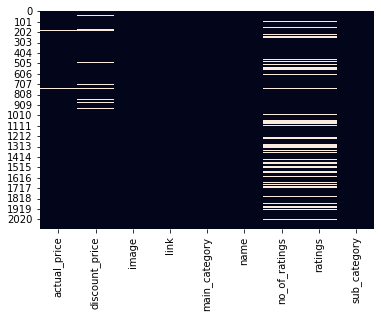

In [60]:
#Visualising the missing data in the columns
import seaborn as sns
#method 1:
sns.heatmap(df.isnull(), cbar=False)

In [61]:
column_names = df.columns
column_names

Index(['actual_price', 'discount_price', 'image', 'link', 'main_category',
       'name', 'no_of_ratings', 'ratings', 'sub_category'],
      dtype='object')

In [62]:
#gettin columns' names spicially sometimes there is a space or unders score in some columns' names
df_columns=df.columns
print(df_columns)

Index(['actual_price', 'discount_price', 'image', 'link', 'main_category',
       'name', 'no_of_ratings', 'ratings', 'sub_category'],
      dtype='object')


## Data Cleaning:  Error checking - use try/except blocks to catch errors. Specifically check the image loading (some URLs may not work) and the price cleanup (the data may be unclean

#### 3. Cleaning the data by removing the strings on the datas

In [63]:
df['actual_price'] = df['actual_price'].str.strip('₹').str.strip(',')
df['discount_price'] = df['discount_price'].str.strip('₹')

# Change & to and  
df['main_category'] = df['main_category'].str.replace('&', 'and')


# Make each word start with Upper Case in name
df['name'] = df['name'].str.title()


In [64]:
df1['actual_price'] = df1['actual_price'].str.strip('₹').str.strip(',')
df1['discount_price'] = df1['discount_price'].str.strip('₹')

# Change & to and  
df1['main_category'] = df1['main_category'].str.replace('&', 'and')


# Make each word start with Upper Case in name
df1['name'] = df1['name'].str.title()


df2['actual_price'] = df2['actual_price'].str.strip('₹').str.strip(',')
df2['discount_price'] = df2['discount_price'].str.strip('₹')

# Change & to and  
df2['main_category'] = df2['main_category'].str.replace('&', 'and')


# Make each word start with Upper Case in name
df2['name'] = df2['name'].str.title()


#### 4. Converting the data into float format since they are numerical data(continuous data)

In [65]:
df['actual_price'] = pd.to_numeric(df['actual_price'], errors = 'coerce')
df['discount_price'] = pd.to_numeric(df['discount_price'], errors = 'coerce')
df['no_of_ratings'] = pd.to_numeric(df['no_of_ratings'], errors = 'coerce')
df['ratings'] = pd.to_numeric(df['ratings'], errors = 'coerce')

In [66]:
df1['actual_price'] = pd.to_numeric(df1['actual_price'], errors = 'coerce')
df1['discount_price'] = pd.to_numeric(df1['discount_price'], errors = 'coerce')
df1['no_of_ratings'] = pd.to_numeric(df1['no_of_ratings'], errors = 'coerce')
df1['ratings'] = pd.to_numeric(df1['ratings'], errors = 'coerce')


df2['actual_price'] = pd.to_numeric(df['actual_price'], errors = 'coerce')
df2['discount_price'] = pd.to_numeric(df['discount_price'], errors = 'coerce')
df2['no_of_ratings'] = pd.to_numeric(df['no_of_ratings'], errors = 'coerce')
df2['ratings'] = pd.to_numeric(df['ratings'], errors = 'coerce')


In [67]:
# Renaming Each Column
df.rename(columns={
    'actual_price': 'Actual_Price',
    'discount_price': 'Discount_Price',
    'main_category': 'Main_Category',
    'name': 'Name',
    'no_of_ratings': 'No_of_Ratings',
    'ratings': 'Ratings',
    'sub_category': 'Sub_Category'
}, inplace=True)


# Renaming Each Column
df1.rename(columns={
    'actual_price': 'Actual_Price',
    'discount_price': 'Discount_Price',
    'main_category': 'Main_Category',
    'name': 'Name',
    'no_of_ratings': 'No_of_Ratings',
    'ratings': 'Ratings',
    'sub_category': 'Sub_Category'
}, inplace=True)

# Renaming Each Column
df2.rename(columns={
    'actual_price': 'Actual_Price',
    'discount_price': 'Discount_Price',
    'main_category': 'Main_Category',
    'name': 'Name',
    'no_of_ratings': 'No_of_Ratings',
    'ratings': 'Ratings',
    'sub_category': 'Sub_Category'
}, inplace=True)

df.dtypes

Actual_Price      float64
Discount_Price    float64
image              object
link               object
Main_Category      object
Name               object
No_of_Ratings     float64
Ratings           float64
Sub_Category       object
dtype: object

# image loading

## Exploratory Data Analysis(EDA)

### Univariate Analysis

#frequency distribution

In [68]:
df.Sub_Category.value_counts()

Strength Training    1104
Car Electronics      1008
Name: Sub_Category, dtype: int64

In [69]:
df.Main_Category.value_counts()

sports and fitness    1104
car and motorbike     1008
Name: Main_Category, dtype: int64

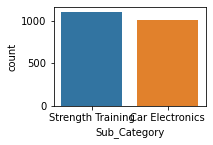

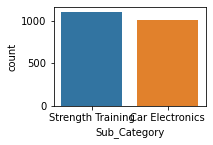

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.subplot(2,2,3)
sns.countplot(x='Sub_Category',data=df)
plt.show()

plt.subplot(2,2,3)
sns.countplot(x='Sub_Category',data=df)
plt.show()

In [71]:
count_Sub_Category = df['Sub_Category'].value_counts().reset_index()
count_Sub_Category

,index,Sub_Category
0,Strength Training,1104
1,Car Electronics,1008


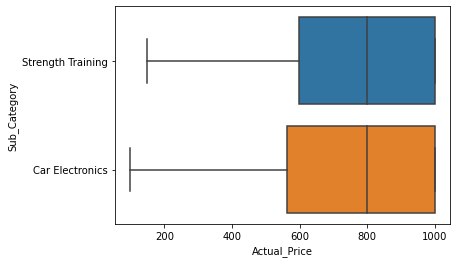

In [72]:
ax = sns.boxplot(x='Actual_Price', y='Sub_Category', data=df)



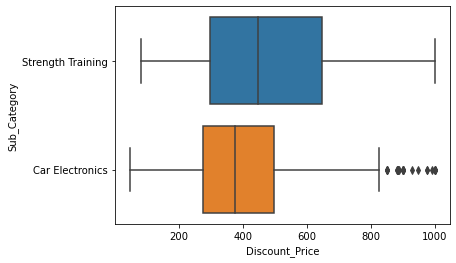

In [73]:
ax = sns.boxplot(x='Discount_Price', y='Sub_Category', data=df)

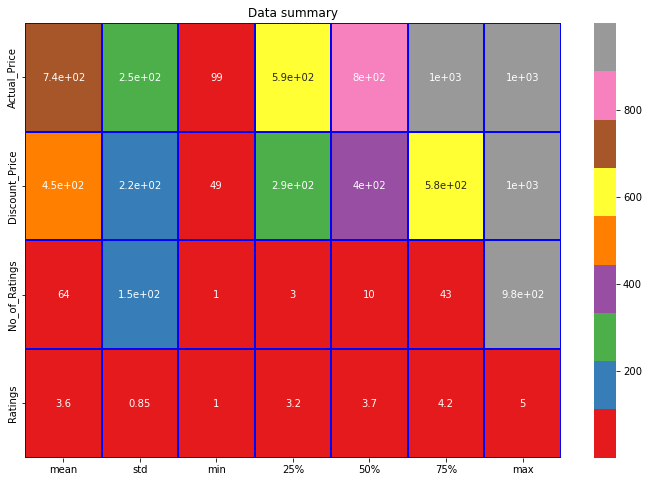

In [74]:
#Let’s check out the data summary!
plt.figure(figsize=(12,8))
sns.heatmap(df.describe()[1:].transpose(),
            annot=True,linecolor="b",
            linewidth=2,cmap=sns.color_palette("Set1"))
plt.title("Data summary")
plt.show()

#### 1. Plotting the correlation coefficient heatmap to visualize the relationship of each numericle variable

<AxesSubplot:>

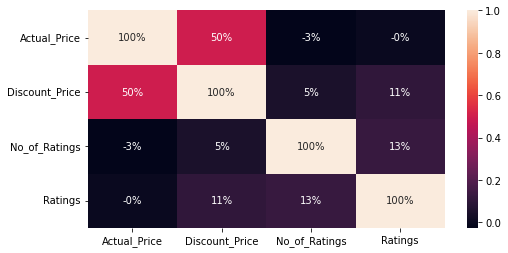

In [75]:
#Heatmap to plot all correlations between features
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

#### 2. Plotting the scatterplots for each numerical variable to visualize their relationships

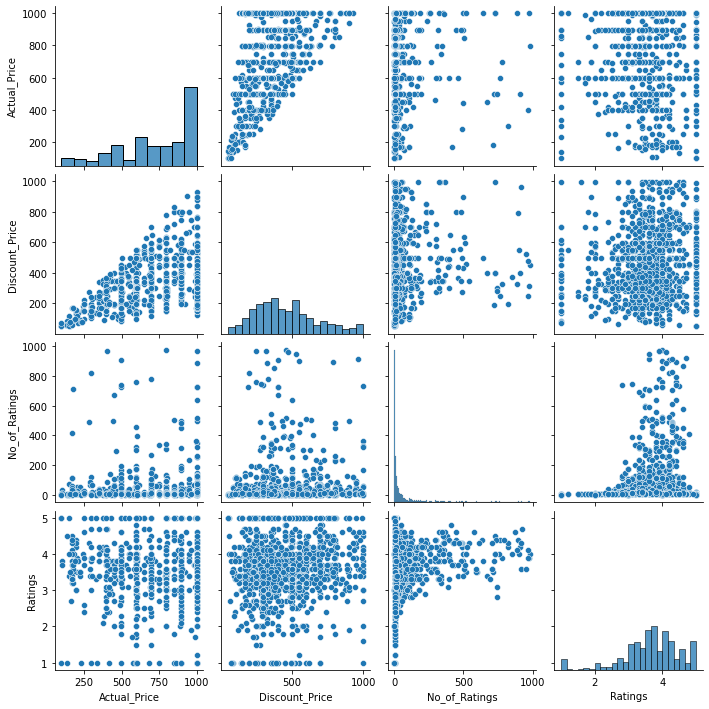

In [76]:
sns.pairplot(df)

In [77]:
df.apply(lambda x: sum(x.isnull()))

Actual_Price      1121
Discount_Price     675
image                0
link                 0
Main_Category        0
Name                 0
No_of_Ratings      572
Ratings            491
Sub_Category         0
dtype: int64

In [78]:
#method 2:
#calculatin no. of missing values for each column and it's percentage
def percentage_of_miss():
  df1=df[df.columns[df.isnull().sum()>=1]]
  total_miss = df1.isnull().sum().sort_values(ascending=False)
  percent_miss = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)
  missing_data = pd.concat([total_miss, percent_miss], axis=1, keys=['Number of Missing', 'Percentage'])
  return(missing_data)

percentage_of_miss()

,Number of Missing,Percentage
Actual_Price,1121,0.530777
Discount_Price,675,0.319602
No_of_Ratings,572,0.270833
Ratings,491,0.232481


#### OUTLIERS TREATMENT FOR CONTINUOUS VARIABLES

In [79]:
df_num=df.select_dtypes(exclude ='object')# Just get me the numeric variables
df_num.columns

Index(['Actual_Price', 'Discount_Price', 'No_of_Ratings', 'Ratings'], dtype='object')

In [80]:
#Features with Outliers 
numcol=['Actual_Price', 'Discount_Price', 'No_of_Ratings', 'Ratings']
for column in numcol:
    if df[column].quantile(.9973)<df[column].max():
        print(column)
        print('99th Percentile',df[column].quantile(.9973))
        print('Max',df[column].max())
        print('Outliers Present in Column {}'.format(column))
        print('')
    elif df[column].quantile(0)>df[column].min():
        print(column)
        print('99th Percentile',df[column].quantile(.9973))
        print('Min',df[column].min())
        print('Outliers Present in Column {}'.format(column))
        print('')
    else:
        pass

No_of_Ratings
99th Percentile 944.1174999999969
Max 977.0
Outliers Present in Column No_of_Ratings



In [81]:
#calculating the Interquartile range of Price
IQR=df.No_of_Ratings.quantile(0.75)-df.No_of_Ratings.quantile(0.25)

#calculating the borders of the normal distribution of No_of_Ratings
lower_bridge=df['No_of_Ratings'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['No_of_Ratings'].quantile(0.75)+(IQR*1.5)

#Inpute the outliers with the max values that are present for the normal distribution of No_of_Ratings
df.loc[df['No_of_Ratings']>=upper_bridge,'No_of_Ratings']=upper_bridge

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='No_of_Ratings'>

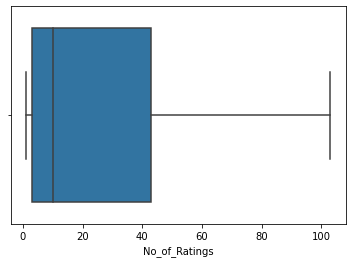

In [82]:
sns.boxplot(df['No_of_Ratings'])

In [83]:
#calculating the Interquartile range of Ratings
IQR=df.Ratings.quantile(0.75)-df.Ratings.quantile(0.25)

#calculating the borders of the normal distribution of Ratings
lower_bridge=df['Ratings'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Ratings'].quantile(0.75)+(IQR*1.5)

#Inpute the outliers with the max values that are present for the normal distribution of Ratings
df.loc[df['Ratings']>=upper_bridge,'Ratings']=upper_bridge

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ratings'>

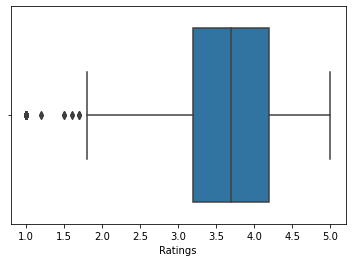

In [84]:
sns.boxplot(df['Ratings'])

In [85]:
#calculating the Interquartile range of Actual_Price
IQR=df.Actual_Price.quantile(0.75)-df.Actual_Price.quantile(0.25)

#calculating the borders of the normal distribution of Actual_Price
lower_bridge=df['Actual_Price'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Actual_Price'].quantile(0.75)+(IQR*1.5)

#Inpute the outliers with the max values that are present for the normal distribution of Actual_Price
df.loc[df['Actual_Price']>=upper_bridge,'Actual_Price']=upper_bridge

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Actual_Price'>

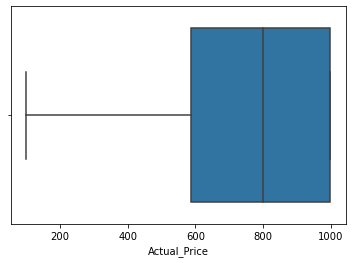

In [86]:
sns.boxplot(df['Actual_Price'])

In [87]:

#calculating the Interquartile range of Discount_Price
IQR=df.Discount_Price.quantile(0.75)-df.Discount_Price.quantile(0.25)

#calculating the borders of the normal distribution of Discount_Price
lower_bridge=df['Discount_Price'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Discount_Price'].quantile(0.75)+(IQR*1.5)

#Inpute the outliers with the max values that are present for the normal distribution of Discount_Price
df.loc[df['Discount_Price']>=upper_bridge,'Discount_Price']=upper_bridge

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Discount_Price'>

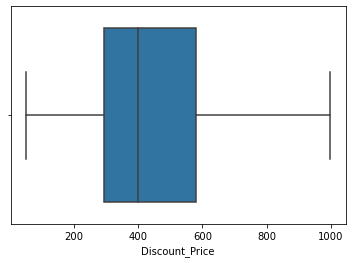

In [88]:
sns.boxplot(df['Discount_Price'])

# Transforming Vraiables

Text(0.5, 1.0, 'Discount_Price')

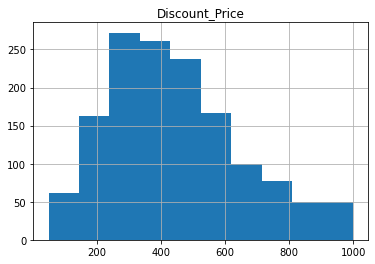

In [89]:
df['Discount_Price'].hist(bins=10)
plt.title('Discount_Price')

Text(0.5, 1.0, 'LogDiscount_Price')

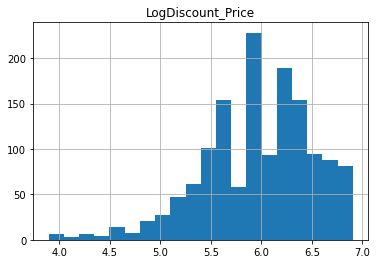

In [90]:
df['Discount_Price_log'] = np.log(df['Discount_Price'])
df['Discount_Price_log'].hist(bins=20)
plt.title('LogDiscount_Price')

Text(0.5, 1.0, 'Actual_Price')

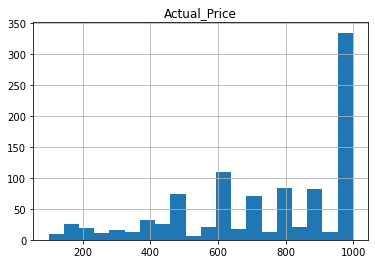

In [91]:
df['Actual_Price'].hist(bins=20)
plt.title('Actual_Price')

Text(0.5, 1.0, 'LogActual_Price')

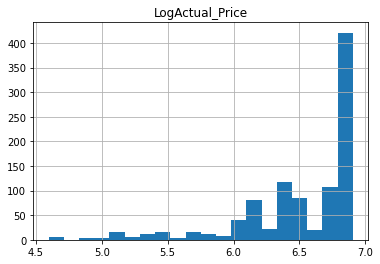

In [92]:
df['Actual_Price_log'] = np.log(df['Actual_Price'])
df['Actual_Price_log'].hist(bins=20)
plt.title('LogActual_Price')

# Products should have several methods, not limited to, but including:
# A __str__ function that prints the product in a nice format, displaying:
# The product name
# The image
# The product rating
# The product price

In [93]:
import pandas as pd

def print_product_info(df):
    for index, row in df.iterrows():
        print("Product Name:", row['Name'])
        print("Main Category:", row['Main_Category'])
        print("Sub Category:", row['Sub_Category'])
        print("Actual Price: ${:.2f}".format(row['Actual_Price']))
        print("Discount Price: ${:.2f}".format(row['Discount_Price']))
        print("Ratings: {:.2f}".format(row['Ratings']))
        print("Number of Ratings: {}".format(row['No_of_Ratings']))
        print("Image: {}".format(row['image']))
        print("Product Link: {}".format(row['link']))
        print("\n")

# Assuming you have a DataFrame named 'df' with the specified columns
# You can call the function like this
print_product_info(df)


Product Name: Protoner 16Kg Pvc Combo Home Gym Package
Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $nan
Discount Price: $965.08
Ratings: 3.60
Number of Ratings: 103.0
Image: https://m.media-amazon.com/images/I/71K-gcsnOYL._AC_UL320_.jpg
Product Link: https://www.amazon.in/Protoner-16Kg-PVC-Combo-Package/dp/B08HZ7MY7T/ref=sr_1_97?qid=1679218003&s=sports&sr=1-97


Product Name: Unisex Hexagon Rubber Vinyl Fixed Dumbbell - Pair Set Hand Weights For Strength Training - Weight Loss, Workout Bench, Gym...
Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $nan
Discount Price: $389.00
Ratings: 4.40
Number of Ratings: 103.0
Image: https://m.media-amazon.com/images/I/71pcrSXprsL._AC_UL320_.jpg
Product Link: https://www.amazon.in/Generic-Vinyl-Coated-Iron-Dumbbells/dp/B07PM1ZMHK/ref=sr_1_98?qid=1679218003&s=sports&sr=1-98


Product Name: Lafillette 150 Lbs Metal Hand Gripper Forearm Wrist Heavy Strength Exercise Hand Grip/Fitness G

Actual Price: $699.00
Discount Price: $330.00
Ratings: 3.90
Number of Ratings: 103.0
Image: https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/61KjTpaF38L._AC_UL320_.jpg
Product Link: https://www.amazon.in/Strauss-Moto-Push-Pair-Black/dp/B08F9P2T69/ref=sr_1_528?qid=1679218010&s=sports&sr=1-528


Product Name: Usi Universal Push Up Bars Foam (850Pb)
Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $649.00
Discount Price: $549.00
Ratings: 3.70
Number of Ratings: 10.0
Image: https://m.media-amazon.com/images/I/41UG8f8+JoL._AC_UL320_.jpg
Product Link: https://www.amazon.in/USI-UNIVERSAL-Push-Bars-850PB/dp/B08PV21TXK/ref=sr_1_553_mod_primary_new?qid=1679218012&s=sports&sbo=RZvfv%2F%2FHxDF%2BO5021pAnSA%3D%3D&sr=1-553


Product Name: Netclick® Resistance Exercise Stretching Bands With Door Anchor, Handles, Waterproof Carry Bag, Legs Ankle Straps For Resi...
Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $999.00

Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $nan
Discount Price: $nan
Ratings: 4.10
Number of Ratings: 12.0
Image: https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/51a-LPtmemL._AC_UL320_.jpg
Product Link: https://www.amazon.in/Combo-Straight-Steel-Dumbbell-Spring/dp/B07VTPVR6H/ref=sr_1_1135?qid=1679218020&s=sports&sr=1-1135


Product Name: Corso Solid Chrome Plated 25 Mm Straight Thick Barbell Bar (4Feet, 5 Feet), Weight Lifting Rod, Gym Bar, Dumbbell Bar For ...
Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $nan
Discount Price: $nan
Ratings: 3.90
Number of Ratings: 8.0
Image: https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/51YP5J6yhhL._AC_UL320_.jpg
Product Link: https://www.amazon.in/CORSO-Straight-Dumbbell-Strength-Training/dp/B0BFYMQT3F/ref=sr_1_1136?qid=1679218020&s=sports&sr=1-1136


Product Name: Sus Products Weight Lifting Rod, Gym Bar, Chrome Plated Steel Gym Rod, 3

Number of Ratings: 103.0
Image: https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T2/images/I/41ZfiXACNsL._AC_UL320_.jpg
Product Link: https://www.amazon.in/Usi-Arm-Blaster-Biceps-Contentrator/dp/B01BEVRIWQ/ref=sr_1_1307_mod_primary_new?qid=1679218024&s=sports&sbo=RZvfv%2F%2FHxDF%2BO5021pAnSA%3D%3D&sr=1-1307


Product Name: Ks Creations Heavy Duty Parallel Push Up Bars In Black
Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $nan
Discount Price: $850.00
Ratings: 4.60
Number of Ratings: 10.0
Image: https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T2/images/I/310v8vIYRwL._AC_UL320_.jpg
Product Link: https://www.amazon.in/KS-Creations-Heavy-parallel-black/dp/B09Q676525/ref=sr_1_1308?qid=1679218024&s=sports&sr=1-1308


Product Name: Protoner 20Kg Adjustable Dumbbells With Gloves And Hand Gripper
Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $nan
Discount Price: $711.34
Ratings: 3.50
Number of Ratings: 24.0
I

Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $nan
Discount Price: $789.00
Ratings: 4.50
Number of Ratings: 2.0
Image: https://m.media-amazon.com/images/I/310X8Ob4prL._AC_UL320_.jpg
Product Link: https://www.amazon.in/Super-Exercise-Improve-Strength-Dexterity/dp/B07NQC3DY5/ref=sr_1_2050?qid=1679218038&s=sports&sr=1-2050


Product Name: Produman Hub Home Gym Bench Heavy Duty Benchphelix Mutipurpose Gym Exercise Bench, Weight Lifting Multi Bench (400 Kg Capa...
Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $nan
Discount Price: $nan
Ratings: nan
Number of Ratings: nan
Image: https://m.media-amazon.com/images/I/31nq0NVuAHS._AC_UL320_.jpg
Product Link: https://www.amazon.in/PRODUMAN-BenchPHELIX-MUTIPURPOSE-Exercise-Extension/dp/B09VBKBBGC/ref=sr_1_2051?qid=1679218038&s=sports&sr=1-2051


Product Name: Ah Unisex Hexagon Rubber Vinyl Fixed Dumbbell - Pair Set Of 2, 1 Kg Pink Hand Weights For Strength Training - Weight Loss,..

Ratings: nan
Number of Ratings: nan
Image: https://m.media-amazon.com/images/I/51XAX3LDmbL._AC_UL320_.jpg
Product Link: https://www.amazon.in/Konark-Fitness-Straight-Training-Internal/dp/B0BHF1RSB9/ref=sr_1_3096?qid=1679218053&s=sports&sr=1-3096


Product Name: Se Fitness 3 Feet Curling Olympic Barbell Rod Heavy Weight Lifting Training For Gym Fitness Workout (30 Mm Internal Dia & ...
Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $nan
Discount Price: $nan
Ratings: 5.00
Number of Ratings: 4.0
Image: https://m.media-amazon.com/images/I/51hHAEzEywL._AC_UL320_.jpg
Product Link: https://www.amazon.in/SE-Fitness-Curling-Training-Internal/dp/B08YFJ98KP/ref=sr_1_3121?qid=1679218055&s=sports&sr=1-3121


Product Name: Hashco Solid Metal Aluminum Roller Idler Pulley Lifting Rope, Wall, Gym, Exercise, Pull Up Bar, Climbing, Hanginsg, Ziplin...
Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $699.00
Discount Price: $498.00
Ratings: 3

Actual Price: $nan
Discount Price: $806.55
Ratings: 4.00
Number of Ratings: 78.0
Image: https://m.media-amazon.com/images/I/61zEs7rTHkL._AC_UL320_.jpg
Product Link: https://www.amazon.in/Dolphy-Foldable-Abdominal-Roller-Exerciser/dp/B01MU3HGQI/ref=sr_1_3322?qid=1679218058&s=sports&sr=1-3322


Product Name: Simran Sports Mugdar, 10Kg Wooden Indian Mugdar, Clubs, Meel, Clubbell, Karla Kattai, Mugdar, Original Manufactured From S...
Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $nan
Discount Price: $nan
Ratings: 4.00
Number of Ratings: 103.0
Image: https://m.media-amazon.com/images/I/71Su2hyFNPL._AC_UL320_.jpg
Product Link: https://www.amazon.in/SIMRAN-SPORTS-Mugdar-Indian-Wooden/dp/B07PN7TLWK/ref=sr_1_3323?qid=1679218058&s=sports&sr=1-3323


Product Name: Simran Sports 8Kg Mugdar Wooden
Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $nan
Discount Price: $nan
Ratings: 4.20
Number of Ratings: 7.0
Image: https://m.media-amaz

Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $nan
Discount Price: $nan
Ratings: 4.20
Number of Ratings: 14.0
Image: https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T2/images/I/41GbuAN5uLL._AC_UL320_.jpg
Product Link: https://www.amazon.in/HASHTAG-FITNESS-Storage-Equipment-Capacity/dp/B09HSP11B7/ref=sr_1_3532?qid=1679218063&s=sports&sr=1-3532


Product Name: Olympic Barbell Rubber Weight Plate 5 Kg With 50Mm Hole Dia For Home/Gym | Weight Plates (Colour May Vary)
Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $nan
Discount Price: $980.00
Ratings: 3.60
Number of Ratings: 12.0
Image: https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T2/images/I/416smus1gYL._AC_UL320_.jpg
Product Link: https://www.amazon.in/Olympic-Barbell-Rubber-Weight-Plates/dp/B09GY2J7J8/ref=sr_1_3533?qid=1679218063&s=sports&sr=1-3533


Product Name: Griffin 6Kg Pvc Black Kettlebell Weight
Main Category: sports and fitness
Sub Category

Product Link: https://www.amazon.in/Kore-PVC-16-Home-Gym/dp/B089GH4QSR/ref=sr_1_4028?qid=1679218070&s=sports&sr=1-4028


Product Name: Kakss Solid Neoprene Coated Weight Plates Pack Of 2Pc X 4Kg (Proudly Made In India)
Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $nan
Discount Price: $nan
Ratings: 4.00
Number of Ratings: 5.0
Image: https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T2/images/I/71ipGeq2hWL._AC_UL320_.jpg
Product Link: https://www.amazon.in/Kakks-Neoprene-Coated-Weight-Plates/dp/B07X3BPR71/ref=sr_1_4029?qid=1679218070&s=sports&sr=1-4029


Product Name: 20 Kg Body Maxx Home Gym Plates 2 Kg X 4 Pcs + 3 Kg X 4 Pcs (Rubber Weight)
Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $nan
Discount Price: $nan
Ratings: nan
Number of Ratings: nan
Image: https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T2/images/I/31foKTemUJL._AC_UL320_.jpg
Product Link: https://www.amazon.in/Body-Maxx-Plates-Rubber-We

Product Link: https://www.amazon.in/Mutu-Urbanpace-Pro-Grip-Triceps-20-inch/dp/B07XLZ8DZV/ref=sr_1_4322?qid=1679218077&s=sports&sr=1-4322


Product Name: Samplus Mall Push Up Bar Stand For Home Gym Workout (Color May Vary)
Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $599.00
Discount Price: $339.00
Ratings: 2.70
Number of Ratings: 8.0
Image: https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T2/images/I/61bGUGUaFiL._AC_UL320_.jpg
Product Link: https://www.amazon.in/Samplus-Mall-Stand-Workout-Color/dp/B074FXZXNR/ref=sr_1_4323?qid=1679218077&s=sports&sr=1-4323


Product Name: Good Life Products Power Tower Xx1
Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $nan
Discount Price: $nan
Ratings: 4.80
Number of Ratings: 16.0
Image: https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T2/images/I/71nCCw70+DL._AC_UL320_.jpg
Product Link: https://www.amazon.in/GOOD-LIFE-PRODUCTS-Power-Tower/dp/B074CVZDN8/ref=sr_1_4324

Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $nan
Discount Price: $nan
Ratings: 3.80
Number of Ratings: 21.0
Image: https://m.media-amazon.com/images/I/31zCkdD63JL._AC_UL320_.jpg
Product Link: https://www.amazon.in/Protoner-Monkey-Height-Increase-Black/dp/B08WLQKMBH/ref=sr_1_4851?qid=1679218086&s=sports&sr=1-4851


Product Name: Set Of 2 Pvc Dumbbells Weight Fittness Home Gym Exersice (Pack Of 2) For Both Women And Men
Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $nan
Discount Price: $350.00
Ratings: 4.60
Number of Ratings: 2.0
Image: https://m.media-amazon.com/images/I/81boUvhwjRL._AC_UL320_.jpg
Product Link: https://www.amazon.in/Dumbbells-Weight-Fittness-Exersice-Women/dp/B08LC8M94T/ref=sr_1_4852?qid=1679218086&s=sports&sr=1-4852


Product Name: Lafillette Resistance Bands Set – Include 5 Stack Able Exercise Bands With Carry Bag, Door Anchor Attachment,
Main Category: sports and fitness
Sub Category: Strength Trai

Product Link: https://www.amazon.in/NJV-Combo-Exerciser-Equipment-Abdominal/dp/B09DYV4BD1/ref=sr_1_5177?qid=1679218091&s=sports&sr=1-5177


Product Name: Fbx Pvc Fixed Dumbbells Weights, 2 Kg X 2, 4Kg Black
Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $850.00
Discount Price: $832.00
Ratings: 3.60
Number of Ratings: 59.0
Image: https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T2/images/I/61z1C-ySyoL._AC_UL320_.jpg
Product Link: https://www.amazon.in/FBX-PVC-4kg-Dumbbells-Weights/dp/B08JDWX6K5/ref=sr_1_5178?qid=1679218091&s=sports&sr=1-5178


Product Name: Simran Sports Wooden Black Home Clubs/Mugdar/Meel/Clubbell/Karla Katai For Exercise (10Kg)
Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $nan
Discount Price: $nan
Ratings: 4.40
Number of Ratings: 4.0
Image: https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T2/images/I/71bnayEvurL._AC_UL320_.jpg
Product Link: https://www.amazon.in/SIMRAN-SPORTS-Wooden-

Image: https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/61A0zWO0e2L._AC_UL320_.jpg
Product Link: https://www.amazon.in/FIT-FITNESS-Exercise-Fitness-Workout/dp/B09YS5ZL28/ref=sr_1_5987?qid=1679218102&s=sports&sr=1-5987


Product Name: Fastero Fitness? Adjustable Dumbbells, Free Weight Set, Dumbbell Barbell 2 In 1, Easy Assembly And Save Space, Home Gym Eq...
Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $nan
Discount Price: $nan
Ratings: 2.40
Number of Ratings: 18.0
Image: https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/81D+cXkveLL._AC_UL320_.jpg
Product Link: https://www.amazon.in/FASTERO-FITNESS-Adjustable-Dumbbells-ENVIRTNMENT/dp/B09W9HM8J3/ref=sr_1_5988?qid=1679218102&s=sports&sr=1-5988


Product Name: Sunshine Enterprise Multi Purpose Wonder Arms Exercises Tool || Upper Body Good Figure Fitness || Cross Fit Arm Power Trai...
Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $5

Product Link: https://www.amazon.in/Kore-K-16kg-Combo-DD2-Home/dp/B019FBZ46E/ref=sr_1_6077?qid=1679218105&s=sports&sr=1-6077


Product Name: Protoner Pair Of 7 Kg Steel Dumbbells
Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $nan
Discount Price: $nan
Ratings: 3.40
Number of Ratings: 2.0
Image: https://m.media-amazon.com/images/I/41xZFteoJrL._AC_UL320_.jpg
Product Link: https://www.amazon.in/PROTONER-PAIR-KG-STEEL-DUMBBELLS/dp/B00L57KF4S/ref=sr_1_6078?qid=1679218105&s=sports&sr=1-6078


Product Name: Arrow Fitness Adjustable Pvc Dumbbell 3.5 Kg To 8.5 Kg For Strength Training, Full Body Workout, And Muscle Building Men W...
Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $nan
Discount Price: $nan
Ratings: 4.00
Number of Ratings: 1.0
Image: https://m.media-amazon.com/images/I/71R8j5d797L._AC_UL320_.jpg
Product Link: https://www.amazon.in/Adjustable-Dumbbell-Strength-Training-Yellow-Black/dp/B0BMGPBCLB/ref=sr_1_6079?qid=167

Sub Category: Strength Training
Actual Price: $nan
Discount Price: $419.00
Ratings: 3.40
Number of Ratings: 2.0
Image: https://m.media-amazon.com/images/I/61Z3K2+TyBL._AC_UL320_.jpg
Product Link: https://www.amazon.in/FreshDcart-Resistance-Stretching-Waterproof-Multicolor/dp/B09YV9C7BX/ref=sr_1_6764?qid=1679218116&s=sports&sr=1-6764


Product Name: Headturners Weight Lifting Hooks Lifting Wrist Straps Pull Ups Deadlift Straps For Power Lifting Lifting Grips With Padded...
Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $nan
Discount Price: $599.00
Ratings: 4.00
Number of Ratings: 1.0
Image: https://m.media-amazon.com/images/I/61C6fKTPCxL._AC_UL320_.jpg
Product Link: https://www.amazon.in/HeadTurners-Lifting-Deadlift-Workout-Weightlifting/dp/B09KLBD6YF/ref=sr_1_6765?qid=1679218116&s=sports&sr=1-6765


Product Name: Hirnots Triple Toning Tube/ Resistance Tube (Easily Convertible To Double And Single Toning Tube)
Main Category: sports and fitness
Sub Catego

Product Name: Kore 50 Kg Home Gym Set With One 3 Ft Curl + One 5 Ft Plain Rod + Pair Dumbbell Rods + Multipurpose Fitness Bench (3-In-1...
Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $nan
Discount Price: $nan
Ratings: 3.60
Number of Ratings: 103.0
Image: https://m.media-amazon.com/images/I/712fJxM2AaL._AC_UL320_.jpg
Product Link: https://www.amazon.in/Kore-50Kg-Combo-Multipurpose-Bench/dp/B07588B2G8/ref=sr_1_7476?qid=1679218128&s=sports&sr=1-7476


Product Name: Body Maxx 20 Kg Home Gym Plates 10 Kg X 2 Pcs (Rubber Weight)
Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $nan
Discount Price: $nan
Ratings: 3.90
Number of Ratings: 34.0
Image: https://m.media-amazon.com/images/I/41K3MhugwOL._AC_UL320_.jpg
Product Link: https://www.amazon.in/Body-Maxx-Plates-Rubber-Weight/dp/B06Y3MJ59L/ref=sr_1_7477?qid=1679218128&s=sports&sr=1-7477


Product Name: Kobo Foldable Incline Sit Up Bench Ab Workout Home Gym With Dumbell & Resist

Product Name: Serveuttam Hand Wrist Forearm Strengthener, Adjustable Hand Grip Workout Training Exerciser Equipment, Enhance Muscle Stre...
Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $nan
Discount Price: $450.00
Ratings: 3.50
Number of Ratings: 9.0
Image: https://m.media-amazon.com/images/I/61xY+GfHb9L._AC_UL320_.jpg
Product Link: https://www.amazon.in/Serveuttam-Strengthener-Adjustable-Exerciser-Equipment/dp/B084MLTGDK/ref=sr_1_8029?qid=1679218136&s=sports&sr=1-8029


Product Name: Spanco 3 Pair Cotton Material Wristband For All Sports ,Gym ,Workout ,Yoga & Fitness
Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $549.00
Discount Price: $150.94
Ratings: nan
Number of Ratings: nan
Image: https://m.media-amazon.com/images/I/411KWQKFEjL._AC_UL320_.jpg
Product Link: https://www.amazon.in/SPANCO-Sweat-Band-Black-White/dp/B083W16TLS/ref=sr_1_8030?qid=1679218136&s=sports&sr=1-8030


Product Name: Aurion Handgrip1040 Adjustab

Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $999.00
Discount Price: $491.00
Ratings: 4.20
Number of Ratings: 2.0
Image: https://m.media-amazon.com/images/I/51OKTj727FL._AC_UL320_.jpg
Product Link: https://www.amazon.in/DROZIP-Adjustable-Exercise-Resistance-Comfortable/dp/B09H5RHSBB/ref=sr_1_8217?qid=1679218141&s=sports&sr=1-8217


Product Name: Fitbox Sports 3 In 1 Convertible Dumbbells Kit For Home Gym 18 Kg (2Kg X 4 + 2.5Kg X 4), Black
Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $nan
Discount Price: $nan
Ratings: 1.00
Number of Ratings: 1.0
Image: https://m.media-amazon.com/images/I/716kIE7LWYL._AC_UL320_.jpg
Product Link: https://www.amazon.in/FitBox-Sports-Convertible-Dumbbells-2-5kg/dp/B09GPN5BZM/ref=sr_1_8218?qid=1679218141&s=sports&sr=1-8218


Product Name: Kgda Double Toning Resistance Tube Heavy Quality Pull Rope Elastic Rubber Exercise Band For Stretching, Workout, Home Gym ...
Main Category: sports and f

Product Link: https://www.amazon.in/DE-JURE-FITNESS-Imported-Tricep/dp/B01FXQ4TM0/ref=sr_1_9048?qid=1679218151&s=sports&sr=1-9048


Product Name: Adept Folding Abdominal Wheel Multi Functional Ab Wheel Roller - Abdominal Trainers Folding Abdominal Wheel Abdomen Wheel ...
Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $899.00
Discount Price: $621.00
Ratings: nan
Number of Ratings: nan
Image: https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T2/images/I/71FOXPsKMpL._AC_UL320_.jpg
Product Link: https://www.amazon.in/ADEPT-Folding-Abdominal-Functional-Roller/dp/B085NKZ1HZ/ref=sr_1_9313?qid=1679218156&s=sports&sr=1-9313


Product Name: Jukmen 6 Pack Abs Exerciser Machine With 20 Different Modes For Exercise And Fitness-Abs Exerciser-Body Toner-Fat Buster- ...
Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $nan
Discount Price: $nan
Ratings: 2.70
Number of Ratings: 7.0
Image: https://m.media-amazon.com/images/W/IMAGEREN

Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $499.00
Discount Price: $nan
Ratings: 4.60
Number of Ratings: 3.0
Image: https://m.media-amazon.com/images/I/61yjLh6-SVL._AC_UL320_.jpg
Product Link: https://www.amazon.in/Kore-DM-4kg-Combo-Dumbbells-Fitness-Workout/dp/B098TMMCYG/ref=sr_1_9422?qid=1679218158&s=sports&sr=1-9422


Product Name: Kore Pvc Dm-5Kg-Combo 165 Dumbbells Set And Fitness Kit For Men And Women Whole Body Workout, (Blue), 5 Kilograms
Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $579.00
Discount Price: $nan
Ratings: nan
Number of Ratings: nan
Image: https://m.media-amazon.com/images/I/71A3Z78ptZL._AC_UL320_.jpg
Product Link: https://www.amazon.in/Kore-DM-5kg-Combo-Dumbbells-Fitness-kilograms/dp/B098TLBCZX/ref=sr_1_9423?qid=1679218158&s=sports&sr=1-9423


Product Name: Tonlight® Sports Solid V-Shaped Press Down Bar With Imported Rubber Grip Non-Slip Handle Cable Attachment
Main Category: sports and fitne

Discount Price: $485.00
Ratings: nan
Number of Ratings: nan
Image: https://m.media-amazon.com/images/I/41R7233y8yL._AC_UL320_.jpg
Product Link: https://www.amazon.in/Fitness-Olympic-Collars-Barbell-Dumbbell/dp/B09QXDL4NR/ref=sr_1_9596?qid=1679218162&s=sports&sr=1-9596


Product Name: Gym Insane Gym Equipment Set For Home Gym Workout Combo 12Kg Dumbbell Set Weight Lifting 3Ft Straight Barbell Rod,Push Up ...
Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $nan
Discount Price: $nan
Ratings: nan
Number of Ratings: nan
Image: https://m.media-amazon.com/images/I/81NqOgF5RlL._AC_UL320_.jpg
Product Link: https://www.amazon.in/GYM-INSANE-Equipment-Dumbbell-Straight/dp/B09QPSHYDY/ref=sr_1_9597?qid=1679218162&s=sports&sr=1-9597


Product Name: Rockfit Pvc 1Kg To 5Kg Dumbbell Set For Home Gym Work Out, Fitness Kit For Men And Women (4Kg (2Kg X 2))
Main Category: sports and fitness
Sub Category: Strength Training
Actual Price: $nan
Discount Price: $449.00
Ratings: 1

Actual Price: $nan
Discount Price: $929.00
Ratings: 4.30
Number of Ratings: 103.0
Image: https://m.media-amazon.com/images/I/51FlMP22OlL._AC_UL320_.jpg
Product Link: https://www.amazon.in/Swiss-Military-UAM16-Extention-Charger/dp/B07WT23BHZ/ref=sr_1_1345?qid=1679222073&s=electronics&sr=1-1345


Product Name: Tusita Charger For Garmin Forerunner 35 230 235 630 645 Music 735Xt, Approach G10 S20, Vivomove Hr - Usb Charging Cable 10...
Main Category: car and motorbike
Sub Category: Car Electronics
Actual Price: $nan
Discount Price: $790.00
Ratings: 4.40
Number of Ratings: 103.0
Image: https://m.media-amazon.com/images/I/51+kcGuT5lL._AC_UL320_.jpg
Product Link: https://www.amazon.in/Garmin-Forerunner-Charger-Replacement-Charging/dp/B01GO18ZIC/ref=sr_1_1346?qid=1679222073&s=electronics&sr=1-1346


Product Name: Shopmagics Car Charger For Oppo Reno7 Pro / Reno 7 Pro Car Charger Dual Usb Port | High Speed Rapid Fast Turbo Qc 3.0 Andr...
Main Category: car and motorbike
Sub Category: Car Electr

Product Name: Buysasta Car Audio Fm/Am Roof Antenna For Toyota Innova 2005-2012
Main Category: car and motorbike
Sub Category: Car Electronics
Actual Price: $999.00
Discount Price: $250.00
Ratings: nan
Number of Ratings: nan
Image: https://m.media-amazon.com/images/I/61mU0ITvbCL._AC_UL320_.jpg
Product Link: https://www.amazon.in/BuySasta-Antenna-Toyota-Innova-2005-2012/dp/B0BD2CKV8V/ref=sr_1_1512?qid=1679222077&s=electronics&sr=1-1512


Product Name: E-Infinity 22Pcs(11 Set/Pair) Red10Amp T Quick Splice Crimp Terminal Wire Convenient Connector Scotch Lock Quick Splice El...
Main Category: car and motorbike
Sub Category: Car Electronics
Actual Price: $999.00
Discount Price: $125.00
Ratings: 4.20
Number of Ratings: 18.0
Image: https://m.media-amazon.com/images/I/41Ts2ZjsvpL._AC_UL320_.jpg
Product Link: https://www.amazon.in/INFINITY-Terminal-Convenient-Connector-Electrical/dp/B07YMRVJRV/ref=sr_1_1513?qid=1679222078&s=electronics&sr=1-1513


Product Name: Axmon® Car Mount Mobile Holder Wi

Actual Price: $nan
Discount Price: $nan
Ratings: 4.60
Number of Ratings: 3.0
Image: https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/61DsEA1dNdL._AC_UL320_.jpg
Product Link: https://www.amazon.in/JB-RACING-Premium-Mobile-Universal/dp/B08YF96TC2/ref=sr_1_1945?qid=1679222087&s=electronics&sr=1-1945


Product Name: Wolkomhome Car Oe Audio Fm/Am Roof Antenna For Chevrolet Beat Type-2
Main Category: car and motorbike
Sub Category: Car Electronics
Actual Price: $999.00
Discount Price: $499.00
Ratings: 3.30
Number of Ratings: 6.0
Image: https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/71+AZmMldGL._AC_UL320_.jpg
Product Link: https://www.amazon.in/WolkomHome-Audio-Antenna-Chevrolet-Type-2/dp/B08Q3QVJKW/ref=sr_1_1946?qid=1679222087&s=electronics&sr=1-1946


Product Name: Autopearl Car Audio Roof Antenna For Innova 2015 (Black)
Main Category: car and motorbike
Sub Category: Car Electronics
Actual Price: $799.00
Discount Price: $nan
Ratings: 2.80
Number o

Main Category: car and motorbike
Sub Category: Car Electronics
Actual Price: $nan
Discount Price: $349.00
Ratings: 2.50
Number of Ratings: 2.0
Image: https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/715WSkShSfL._AC_UL320_.jpg
Product Link: https://www.amazon.in/SD-Car-Dashboard-Non-Slip-Mat/dp/B09Q14F333/ref=sr_1_2803?qid=1679222106&s=electronics&sr=1-2803


Product Name: Call Mate 150W Car Power Inverter With 1 Ac Outlets And 4.8A Dual Usb Charging Ports Car Adapter With Car Cigarette Lighte...
Main Category: car and motorbike
Sub Category: Car Electronics
Actual Price: $nan
Discount Price: $nan
Ratings: 5.00
Number of Ratings: 1.0
Image: https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/61Sbk8Ca90L._AC_UL320_.jpg
Product Link: https://www.amazon.in/CALL-MATE-Car-Inverter-Cigarette/dp/B08QFBGLK9/ref=sr_1_2804?qid=1679222106&s=electronics&sr=1-2804


Product Name: Cke Bluetooth Fm Usb Aux Card Mp3 Stereo Audio Player Decoder Module Kit With Remo

Ratings: 1.80
Number of Ratings: 3.0
Image: https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T2/images/I/61ZsI3-sZYL._AC_UL320_.jpg
Product Link: https://www.amazon.in/XUEBIN-Holder-Dashboard-Mobile-Smartphone/dp/B09VC742XW/ref=sr_1_2921?qid=1679222110&s=electronics&sr=1-2921


Product Name: Sony Xav-Ax8000 22.7 Cm (8.95) Media Receiver With Bluetooth With Android Auto, Apple Car Play And Weblink (Black)
Main Category: car and motorbike
Sub Category: Car Electronics
Actual Price: $nan
Discount Price: $nan
Ratings: 4.30
Number of Ratings: 5.0
Image: https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T2/images/I/51kXAux5jPL._AC_UL320_.jpg
Product Link: https://www.amazon.in/Sony-XAV-AX8000-Receiver-Bluetooth-Android/dp/B08CN9MVXC/ref=sr_1_2922?qid=1679222110&s=electronics&sr=1-2922


Product Name: Bergmann Cargenius Xf-3 Car Charger 4.8A With 3-In-1 Usb Cable
Main Category: car and motorbike
Sub Category: Car Electronics
Actual Price: $700.00
Discount Price: $650.00
Ratin

Main Category: car and motorbike
Sub Category: Car Electronics
Actual Price: $nan
Discount Price: $nan
Ratings: 4.50
Number of Ratings: nan
Image: https://m.media-amazon.com/images/I/61IKwuO5jpL._AC_UL320_.jpg
Product Link: https://www.amazon.in/iOttie-Holder-iPhone-Samsung-Smartphones/dp/B089J28SHP/ref=sr_1_3059?qid=1679222114&s=electronics&sr=1-3059


Product Name: Humser Electric Scooter/Motorcycle Dc-Dc Convertor, Input: 36V To 72V, Output: 12Vdc 20A (Size:30X65X41Mm)
Main Category: car and motorbike
Sub Category: Car Electronics
Actual Price: $nan
Discount Price: $nan
Ratings: nan
Number of Ratings: nan
Image: https://m.media-amazon.com/images/I/41aAfXf4pyL._AC_UL320_.jpg
Product Link: https://www.amazon.in/HUMSER-Electric-Scooter-Motorcycle-Convertor/dp/B0BR7FNZGX/ref=sr_1_3060?qid=1679222114&s=electronics&sr=1-3060


Product Name: Semaphore® Adjustable Mobile Phone Holder For Car Driving Center Console Dashboard Mount Storage Bracket Adhesive (Compati...
Main Category: car and m

Main Category: car and motorbike
Sub Category: Car Electronics
Actual Price: $699.00
Discount Price: $479.00
Ratings: 3.40
Number of Ratings: 2.0
Image: https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T2/images/I/61bLBifjNnL._AC_UL320_.jpg
Product Link: https://www.amazon.in/GoSale-Car-Charger-Android-Multi-Colour/dp/B07YLS3TYD/ref=sr_1_3144?qid=1679222115&s=electronics&sr=1-3144


Product Name: Infinity Primus 603F 6-1/2" (160Mm) Two-Way Car Coaxial Speaker || 150W Peak, 50W Rms || New 2022 Model
Main Category: car and motorbike
Sub Category: Car Electronics
Actual Price: $nan
Discount Price: $nan
Ratings: 3.60
Number of Ratings: 3.0
Image: https://m.media-amazon.com/images/I/41kQuXwz4AL._AC_UL320_.jpg
Product Link: https://www.amazon.in/Infinity-Primus-603F-Two-Way-Coaxial/dp/B0BBXZGC73/ref=sr_1_3217?qid=1679222118&s=electronics&sr=1-3217


Product Name: Sp 3 Inch 10 Watt Sub Woofer 3 Inch Subwoofer Speaker 4 Ohm 10 Watt Hifi Woofer Deep Bass Coaxial Car Speaker
Main Catego

Ratings: 3.80
Number of Ratings: 103.0
Image: https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T2/images/I/61VstyZdIVL._AC_UL320_.jpg
Product Link: https://www.amazon.in/Pinaaki-Enterprises-Premium-Complete-Protection/dp/B09JP4VG4R/ref=sr_1_3541?qid=1679222124&s=electronics&sr=1-3541


Product Name: Electronic Spices 5'' Inch Woofer Audio Speaker 4Ohm 50W Hi-Fi Speaker Sound Bass (Yellow)
Main Category: car and motorbike
Sub Category: Car Electronics
Actual Price: $458.00
Discount Price: $299.00
Ratings: 3.60
Number of Ratings: 4.0
Image: https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T2/images/I/51hyi8cUu0L._AC_UL320_.jpg
Product Link: https://www.amazon.in/woofer-Audio-Speaker-HI-FI-Yellow/dp/B07MHLT8X2/ref=sr_1_3542?qid=1679222124&s=electronics&sr=1-3542


Product Name: Xgmo® Rear View Mirror Car Cradle Mobile Phone Holder Mount Stand Bracket For All Smartphones
Main Category: car and motorbike
Sub Category: Car Electronics
Actual Price: $999.00
Discount Price: $

Actual Price: $nan
Discount Price: $720.00
Ratings: 4.20
Number of Ratings: 103.0
Image: https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/61+auLT8SKL._AC_UL320_.jpg
Product Link: https://www.amazon.in/Belkin-Universal-Charger-Micro-Cable/dp/B00EDWO8O0/ref=sr_1_3815?qid=1679222129&s=electronics&sr=1-3815


Product Name: Dualport Car Charger For Kia Sonet Htk Plus Turbo Imt Charger Original Qc Car Charger Adapter C Type 3.0A Dual Usb Port Ch...
Main Category: car and motorbike
Sub Category: Car Electronics
Actual Price: $999.00
Discount Price: $499.00
Ratings: nan
Number of Ratings: nan
Image: https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/61mQRqOZOYL._AC_UL320_.jpg
Product Link: https://www.amazon.in/Kia-Sonet-HTK-Plus-Turbo/dp/B0BXL4M35T/ref=sr_1_3816?qid=1679222129&s=electronics&sr=1-3816


Product Name: Ovicart 16 Amp Reset Over Load Circuir Breaker Switch 240V 24V
Main Category: car and motorbike
Sub Category: Car Electronics
Actual Price:

Main Category: car and motorbike
Sub Category: Car Electronics
Actual Price: $999.00
Discount Price: $298.00
Ratings: 3.30
Number of Ratings: 103.0
Image: https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/51f5sPzv60L._AC_UL320_.jpg
Product Link: https://www.amazon.in/NK-STAR-Universal-Portable-Smartphones/dp/B07YX2PL2J/ref=sr_1_4622?qid=1679222143&s=electronics&sr=1-4622


Product Name: Oshotto Car Shark Fin Roof Antenna Car Antenna Radio Fm/Am Car Decorate Compatible With Hyundai I20 Active 2015-2020 - (Bl...
Main Category: car and motorbike
Sub Category: Car Electronics
Actual Price: $nan
Discount Price: $800.00
Ratings: 3.20
Number of Ratings: 36.0
Image: https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/61Q3KGNQ4mL._AC_UL320_.jpg
Product Link: https://www.amazon.in/Oshotto-Antenna-Decorate-Hyundai-Active/dp/B07PY3BVP4/ref=sr_1_4623?qid=1679222143&s=electronics&sr=1-4623


Product Name: Dulcet Dc-S40 240 Watt Outdoor Speaker
Main Category: car


Product Name: Swiss Military Car Invertor (Car Charger + Usb Charger)
Main Category: car and motorbike
Sub Category: Car Electronics
Actual Price: $nan
Discount Price: $nan
Ratings: 4.10
Number of Ratings: nan
Image: https://m.media-amazon.com/images/I/41p8Y7pLHML._AC_UL320_.jpg
Product Link: https://www.amazon.in/Swiss-Military-Car-Invertor-Charger/dp/B08TQQK351/ref=sr_1_4839?qid=1679222148&s=electronics&sr=1-4839


Product Name: Sess Xusive Leather Case Wallet Slim Book Cover With Card Slots Cash Pocket Stand Holder Magnetic Flip Cover For Oppo F7 -...
Main Category: car and motorbike
Sub Category: Car Electronics
Actual Price: $999.00
Discount Price: $399.00
Ratings: 4.00
Number of Ratings: 103.0
Image: https://m.media-amazon.com/images/I/71kMcicADHL._AC_UL320_.jpg
Product Link: https://www.amazon.in/SESS-XUSIVE-Leather-Wallet-Magnetic/dp/B0849M3X9M/ref=sr_1_4840?qid=1679222148&s=electronics&sr=1-4840


Product Name: Vantrue N2 Pro 1920X1080P Uber Dual Dash Cam 2.5K 1440P Single Fr

Product Name: Sd Cass® Anti-Slip Car Dashboard Mat Mobile Phone Mount Navigation Holder ( Pack Of 1 ) Multi Color
Main Category: car and motorbike
Sub Category: Car Electronics
Actual Price: $nan
Discount Price: $349.00
Ratings: nan
Number of Ratings: nan
Image: https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T2/images/I/715WSkShSfL._AC_UL320_.jpg
Product Link: https://www.amazon.in/SD-Anti-Slip-Dashboard-Navigation-Charger/dp/B09PWJ5JFY/ref=sr_1_4956?qid=1679222152&s=electronics&sr=1-4956


Product Name: Yash Enterprises Car Audio Fm/Am Roof Antenna For Mahindra Tuv 300
Main Category: car and motorbike
Sub Category: Car Electronics
Actual Price: $999.00
Discount Price: $299.00
Ratings: 5.00
Number of Ratings: 2.0
Image: https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T2/images/I/515EHymdC4L._AC_UL320_.jpg
Product Link: https://www.amazon.in/Yash-Enterprises-Audio-Antenna-Mahindra/dp/B09F9Y6NSZ/ref=sr_1_4957?qid=1679222152&s=electronics&sr=1-4957


Product Name: Daz

Sub Category: Car Electronics
Actual Price: $999.00
Discount Price: $219.00
Ratings: 3.80
Number of Ratings: 4.0
Image: https://m.media-amazon.com/images/I/61h-ayk0KSL._AC_UL320_.jpg
Product Link: https://www.amazon.in/Pinaaki-Enterprises-Premium-Leather-Designer/dp/B0BHR77HSD/ref=sr_1_5132?qid=1679222155&s=electronics&sr=1-5132


Product Name: Bee Eater Universal Bike Mount Holder Verson 2.0 Metal Body 360 Degree Rotating Mirror Cradle Stand For Bicycle, Motorcycl...
Main Category: car and motorbike
Sub Category: Car Electronics
Actual Price: $nan
Discount Price: $419.00
Ratings: 2.40
Number of Ratings: 2.0
Image: https://m.media-amazon.com/images/I/41FKrmnFQ1L._AC_UL320_.jpg
Product Link: https://www.amazon.in/BEE-EATER-Universal-Motorcycle-Smartphones/dp/B0BGYCQ2WW/ref=sr_1_5133?qid=1679222155&s=electronics&sr=1-5133


Product Name: Tantra S2A Mobile Holder For Bikes One Touch Technology Bike Mobile Holder For Maps And Gps Navigation, 360° Rotation, Fir...
Main Category: car and mot

Number of Ratings: nan
Image: https://m.media-amazon.com/images/I/51bKzlSyw8L._AC_UL320_.jpg
Product Link: https://www.amazon.in/Auto-Addict-Reverse-Parking-Vehicle/dp/B08S6Q48WC/ref=sr_1_5951?qid=1679222168&s=electronics&sr=1-5951


Product Name: Auto Oprema Car Shark Fin Style Roof Mount Fm/Am Radio Antenna Aerial With Wiring Waterproof Signal Decorative Models (Bla...
Main Category: car and motorbike
Sub Category: Car Electronics
Actual Price: $599.00
Discount Price: $368.00
Ratings: 3.00
Number of Ratings: 103.0
Image: https://m.media-amazon.com/images/I/51Qg3ofY3NL._AC_UL320_.jpg
Product Link: https://www.amazon.in/Auto-Oprema-Antenna-Waterproof-Decorative/dp/B08RB3FTFQ/ref=sr_1_5952?qid=1679222168&s=electronics&sr=1-5952


Product Name: Tantra S1A Mobile Holder For Bikes One Touch Technology Bike Mobile Holder For Maps And Gps Navigation, 360° Rotation, Fir...
Main Category: car and motorbike
Sub Category: Car Electronics
Actual Price: $nan
Discount Price: $649.00
Ratings: 4.20
N

Main Category: car and motorbike
Sub Category: Car Electronics
Actual Price: $999.00
Discount Price: $350.00
Ratings: 3.00
Number of Ratings: 2.0
Image: https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/61pdbb06v2L._AC_UL320_.jpg
Product Link: https://www.amazon.in/Jaguar-Mobile-Rotation-Adjustable-Dashboard/dp/B0BPQWKRTV/ref=sr_1_6528?qid=1679222178&s=electronics&sr=1-6528


Product Name: Auto Oprema Car Shark Fin Style Roof Mount Fm/Am Radio Antenna Aerial With Wiring Waterproof Signal Decorative Models (Whi...
Main Category: car and motorbike
Sub Category: Car Electronics
Actual Price: $599.00
Discount Price: $368.00
Ratings: 3.00
Number of Ratings: 103.0
Image: https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/41dX3mLBsTL._AC_UL320_.jpg
Product Link: https://www.amazon.in/Auto-Oprema-Antenna-Waterproof-Decorative/dp/B08RB5JSQY/ref=sr_1_6625?qid=1679222180&s=electronics&sr=1-6625


Product Name: Lkmo® Car Rear View Mirror Mobile Holder Mount S

Ratings: nan
Number of Ratings: nan
Image: https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T2/images/I/61+e1FoGrAL._AC_UL320_.jpg
Product Link: https://www.amazon.in/Vakra-Rearview-Multifunctional-Universal-Automobile/dp/B0BRVHX9K2/ref=sr_1_7924?qid=1679222202&s=electronics&sr=1-7924


Product Name: Dhe Best K3 Car Reverse Parking Sensor With Led Display Grey Set Of 4 Compatible With Toyota Land Cruiser.
Main Category: car and motorbike
Sub Category: Car Electronics
Actual Price: $nan
Discount Price: $745.00
Ratings: nan
Number of Ratings: nan
Image: https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T2/images/I/41-FIGCB-sL._AC_UL320_.jpg
Product Link: https://www.amazon.in/Dhe-Best-Reverse-Compatible-Cruiser/dp/B0BR1CG21M/ref=sr_1_7925?qid=1679222202&s=electronics&sr=1-7925


Product Name: Inplusin Air Vent Car Phone Mount Holder - Magnetic Cell Phone Car Mount Universal For Any Smartphone, Iphone, Android - R...
Main Category: car and motorbike
Sub Category: Car Elec

Product Name: Allure Auto® Magnetic Car Mount Car Mobile Phone Holder For Dashboard, Windscreen Or Work Desk (Black) For Kia Seltos
Main Category: car and motorbike
Sub Category: Car Electronics
Actual Price: $399.00
Discount Price: $228.00
Ratings: 2.50
Number of Ratings: 6.0
Image: https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/61IQrWK5QCL._AC_UL320_.jpg
Product Link: https://www.amazon.in/Allure-Magnetic-Mobile-Dashboard-Windscreen/dp/B08PQQ6KQM/ref=sr_1_8294?qid=1679222208&s=electronics&sr=1-8294


Product Name: Inktree® Poco C3 Flip Case | Premium Leather Finish | With Card Pockets | Wallet Stand |Complete Protection Flip Cover For...
Main Category: car and motorbike
Sub Category: Car Electronics
Actual Price: $499.00
Discount Price: $169.00
Ratings: 3.80
Number of Ratings: 6.0
Image: https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/51Mx9EqnP+L._AC_UL320_.jpg
Product Link: https://www.amazon.in/Inktree%C2%AE-Premium-Leather-Complete-Prot

Discount Price: $nan
Ratings: nan
Number of Ratings: nan
Image: https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T2/images/I/616ym+7ScnL._AC_UL320_.jpg
Product Link: https://www.amazon.in/Amplifier-Automatic-Adjustment-Splitter-Impedance/dp/B09WPCJ25C/ref=sr_1_8471?qid=1679222212&s=electronics&sr=1-8471


Product Name: Safwe - Fire - Tri Column Bookshelf Speaker Stands Universal Floor Speaker Stands Surround Sound Speaker Stand- 2 No'S (Bl...
Main Category: car and motorbike
Sub Category: Car Electronics
Actual Price: $nan
Discount Price: $nan
Ratings: 5.00
Number of Ratings: 2.0
Image: https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T2/images/I/51qYiU-cGnL._AC_UL320_.jpg
Product Link: https://www.amazon.in/SAFWE-Bookshelf-Speaker-Universal-Surround/dp/B09WMJMSMW/ref=sr_1_8472?qid=1679222212&s=electronics&sr=1-8472


Product Name: Shelfkey Aluminium Electrolytic Capacitor 470Uf 50V (B337) Sk-470Uf/50V (Pack Of 4)
Main Category: car and motorbike
Sub Category: Car Ele

Product Name: Speedwav Black Plastic Adhesive Adjustable Roof Top Aerial Antenna Décor For Renault Kwid Gapeg156
Main Category: car and motorbike
Sub Category: Car Electronics
Actual Price: $600.00
Discount Price: $298.00
Ratings: 3.20
Number of Ratings: 10.0
Image: https://m.media-amazon.com/images/I/41ZXOnwJglL._AC_UL320_.jpg
Product Link: https://www.amazon.in/Speedwav-Plastic-Adhesive-Adjustable-gapeg156/dp/B07MDQ5Q69/ref=sr_1_9313?qid=1679222224&s=electronics&sr=1-9313


Product Name: Speedwav Black Plastic Adhesive Adjustable Roof Top Aerial Antenna Décor For Maruti Baleno Ga88
Main Category: car and motorbike
Sub Category: Car Electronics
Actual Price: $600.00
Discount Price: $298.00
Ratings: 1.00
Number of Ratings: 1.0
Image: https://m.media-amazon.com/images/I/41ZXOnwJglL._AC_UL320_.jpg
Product Link: https://www.amazon.in/Speedwav-Plastic-Adhesive-Adjustable-Antenna/dp/B07M9SLN5K/ref=sr_1_9314?qid=1679222224&s=electronics&sr=1-9314


Product Name: Alexvyan Golden High Power Ma

# A method to set the discount price - that can accept either a price or a percentage discount as an argument and calculate a new discount price from the actual price

In [270]:
import pandas as pd

class Product:
    def __init__(self, actual_price, name, main_category, sub_category, ratings, no_of_ratings, image, link):
        self.actual_price = actual_price
        self.name = name
        self.main_category = main_category
        self.sub_category = sub_category
        self.ratings = ratings
        self.no_of_ratings = no_of_ratings
        self.image = image
        self.link = link
        self.discount_price = None  # Initialize discount price as None

    def set_discount(self, discount):
        if isinstance(discount, (int, float)):
            # If 'discount' is a fixed price, subtract it from the actual price
            self.discount_price = self.actual_price - discount
        elif isinstance(discount, str) and discount.endswith('%'):
            # If 'discount' is a percentage, calculate the discounted price
            discount_percentage = float(discount.rstrip('%')) / 100
            self.discount_price = self.actual_price - (self.actual_price * discount_percentage)
        else:
            print("Invalid discount format. Please provide either a price or a percentage discount.")

    def print_product_info(self):
        print("Product Name:", self.name)
        print("Main Category:", self.main_category)
        print("Sub Category:", self.sub_category)
        print("Actual Price: ${:.2f}".format(self.actual_price))
        print("Discount Price: ${:.2f}".format(self.discount_price))
        print("Ratings: {:.2f}".format(self.ratings))
        print("Number of Ratings: {}".format(self.no_of_ratings))
        print("Image: {}".format(self.image))
        print("Product Link: {}".format(self.link))
        print("\n")

# Create a Product instance
product = Product(100.0, "Sample Product", "Electronics", "Smartphones", 4.5, 100, "sample_image.jpg", "sample_link")

# Set the discount price either by fixed price or percentage discount
product.set_discount(10)  # Set a fixed discount of $10
# OR
product.set_discount("20%")  # Set a 20% discount

# Print product information
product.print_product_info()


Product Name: Sample Product
Main Category: Electronics
Sub Category: Smartphones
Actual Price: $100.00
Discount Price: $80.00
Ratings: 4.50
Number of Ratings: 100
Image: sample_image.jpg
Product Link: sample_link




In [97]:
# calculate a new discount price from the actual price

def calculate_discount_price(actual_price, discount):
    if isinstance(discount, (int, float)):
        # If 'discount' is a fixed price, subtract it from the actual price
        discount_price = actual_price - discount
    elif isinstance(discount, str) and discount.endswith('%'):
        # If 'discount' is a percentage, calculate the discounted price
        discount_percentage = float(discount.rstrip('%')) / 100
        discount_price = actual_price - (actual_price * discount_percentage)
    else:
        print("Invalid discount format. Please provide either a price or a percentage discount.")
        return None

    return discount_price

# Example usage:
actual_price = 100.0
fixed_discount = 10.0
percentage_discount = "20%"

new_price_with_fixed_discount = calculate_discount_price(actual_price, fixed_discount)
new_price_with_percentage_discount = calculate_discount_price(actual_price, percentage_discount)

print("New Price with Fixed Discount: ${:.2f}".format(new_price_with_fixed_discount))
print("New Price with Percentage Discount: ${:.2f}".format(new_price_with_percentage_discount))


New Price with Fixed Discount: $90.00
New Price with Percentage Discount: $80.00


# A method to add a rating to a product

In [98]:

import pandas as pd

class Product:
    def __init__(self, actual_price, name, main_category, sub_category, ratings, no_of_ratings, image, link):
        self.actual_price = actual_price
        self.name = name
        self.main_category = main_category
        self.sub_category = sub_category
        self.ratings = ratings
        self.no_of_ratings = no_of_ratings
        self.image = image
        self.link = link

    def add_rating(self, new_rating, message=""):
        if isinstance(new_rating, (int, float)) and 0 <= new_rating <= 5:
            # Check if the new rating is a valid number between 0 and 5
            self.ratings = (self.ratings * self.no_of_ratings + new_rating) / (self.no_of_ratings + 1)
            self.no_of_ratings += 1

            if message:
                print(f"New rating added: {new_rating} - {message}")
            else:
                print(f"New rating added: {new_rating}")
        else:
            print("Invalid rating. Please provide a number between 0 and 5.")

    def print_product_info(self):
        print("Product Name:", self.name)
        print("Main Category:", self.main_category)
        print("Sub Category:", self.sub_category)
        print("Actual Price: ${:.2f}".format(self.actual_price))
        print("Ratings: {:.2f}".format(self.ratings))
        print("Number of Ratings: {}".format(self.no_of_ratings))
        print("Image: {}".format(self.image))
        print("Product Link: {}".format(self.link))
        print("\n")

# Create a Product instance
product = Product(100.0, "Sample Product", "Electronics", "Smartphones", 4.5, 100, "sample_image.jpg", "sample_link")

# Add a new rating with a custom message
new_rating = 4.8
message = "This is the new rating for this product: new_rating = {:.1f}".format(new_rating)
product.add_rating(new_rating, message)

# Print the updated product information
product.print_product_info()


New rating added: 4.8 - This is the new rating for this product: new_rating = 4.8
Product Name: Sample Product
Main Category: Electronics
Sub Category: Smartphones
Actual Price: $100.00
Ratings: 4.50
Number of Ratings: 101
Image: sample_image.jpg
Product Link: sample_link




# Inventory:

## Each inventory object should keep track of all the products along with a stock level.
## The inventory should include methods such as:
## A method to add a new product to the inventory
## A method to remove a product from the inventory
## A method to print all the products in a category in a nice format
## A method to use the + sign to add two inventories together
## A method to get the Top X highest rated products
## A method to change the stock levels for any item in that inventory
## An overload of the length method, to return the number of items in the inventory

In [99]:
# Inventory object using your existing DataFrame df

import pandas as pd

class Inventory:
    def __init__(self):
        self.df = pd.DataFrame()

# A method to add a new product to the inventory

    def add_product(self, product):
        self.df = pd.concat([self.df, product], ignore_index=True)

# A method to remove a product from the inventory
    def remove_product(self, product_name):
        self.df = self.df[self.df['Name'] != product_name]

# A method to print all the products in a category in a nice format

    def print_products_in_category(self, category):
        category_products = self.df[self.df['Main_Category'] == category]
        if not category_products.empty:
            print(category_products)
        else:
            print(f"No products found in category: {category}")

    def __add__(self, other):
        new_inventory = Inventory()
        new_inventory.df = pd.concat([self.df, other.df], ignore_index=True)
        return new_inventory

# A method to get the Top X highest rated products
    def get_top_rated_products(self, x):
        sorted_products = self.df.sort_values(by='Ratings', ascending=False)
        return sorted_products.head(x)
# A method to change the stock levels for any item in that inventory
    def change_stock_level(self, product_name, new_stock_level):
        self.df.loc[self.df['Name'] == product_name, 'Stock_Level'] = new_stock_level

# An overload of the length method, to return the number of items in the inventory
    def __len__(self):
        return len(self.df)

# Create an empty inventory
inventory = Inventory()

# Example data: Use your existing DataFrame 'df': This could be data 1
# Assuming 'df' contains your product data
for index, row in df.iterrows():
    product_data = {
        'Name': row['Name'],
        'Actual_Price': row['Actual_Price'],
        'Discount_Price': row['Discount_Price'],
        'Ratings': row['Ratings'],
        'No_of_Ratings': row['No_of_Ratings'],
        'Main_Category': row['Main_Category'],
        'Stock_Level': 1  # You can initialize the stock level to 0 or any other value
    }
    inventory.add_product(pd.DataFrame([product_data]))

# Create a second inventory
inventory2 = Inventory()

# Example data for the second inventory: This could be data 2

for index, row in df2.iterrows():
    product_data2 = {
        'Name': row['Name'],
        'Actual_Price': row['Actual_Price'],
        'Discount_Price': row['Discount_Price'],
        'Ratings': row['Ratings'],
        'No_of_Ratings': row['No_of_Ratings'],
        'Main_Category': row['Main_Category'],
        'Stock_Level': 0  # You can initialize the stock level to 0 or any other value
    }

inventory2.add_product(pd.DataFrame([product_data2]))

# Combine two inventories
# A method to use the + sign to add two inventories together
combined_inventory = inventory + inventory2

# Example usage:
print("Combined Inventory:")
print(combined_inventory.df)

# You can now use the Inventory methods to manage your combined product inventory.


Combined Inventory:
                                                   Name  Actual_Price  \
0              Protoner 16Kg Pvc Combo Home Gym Package           NaN   
1     Unisex Hexagon Rubber Vinyl Fixed Dumbbell - P...           NaN   
2     Lafillette 150 Lbs Metal Hand Gripper Forearm ...           NaN   
3     Aurion Genuine Leather Pro Weight Lifting Belt...         899.0   
4     Spiro Pvc (Round/Hex) Dumbbells (1 Kg. X 2 = 2...         200.0   
...                                                 ...           ...   
2108  Dt266 Ac/Dc Lcd Digital Clamp Multimeter Elect...         999.0   
2109  Ezip Car Mobile Holder Pad With Charger Cradle...           NaN   
2110  Ovicart 250A Open Cable Ring Lug Terminal Crim...         190.0   
2111  Axan - Game On 360 Degree Adjustable Mtb Mount...         999.0   
2112  Axan - Game On 360 Degree Adjustable Mtb Mount...         999.0   

      Discount_Price  Ratings  No_of_Ratings       Main_Category  Stock_Level  
0             965.08   

In [100]:
# I created this using fake data, maybe you can relate this to your data frame
# # Inventory:

import pandas as pd

class Inventory:
    def __init__(self):
        self.df = pd.DataFrame()

    def add_product(self, product):
        self.df = pd.concat([self.df, product], ignore_index=True)

    def remove_product(self, product_name):
        self.df = self.df[self.df['name'] != product_name]

    def print_products_in_category(self, category):
        category_products = self.df[self.df['Main_Category'] == category]
        if not category_products.empty:
            print(category_products)
        else:
            print(f"No products found in category: {category}")

    def __add__(self, other):
        new_inventory = Inventory()
        new_inventory.df = pd.concat([self.df, other.df], ignore_index=True)
        return new_inventory

    def get_top_rated_products(self, x):
        sorted_products = self.df.sort_values(by='Ratings', ascending=False)
        return sorted_products.head(x)

    def change_stock_level(self, product_name, new_stock_level):
        self.df.loc[self.df['name'] == product_name, 'Stock_Level'] = new_stock_level

    def __len__(self):
        return len(self.df)

# Example usage:
if __name__ == '__main__':
    # Create an empty inventory
    inventory = Inventory()

    # Example data for products
    product1 = {
        'name': 'Product 1',
        'Actual_Price': 100,
        'Discount_Price': 80,
        'Ratings': 4.5,
        'No_of_Ratings': 500,
        'Main_Category': 'Electronics',
        'Stock_Level': 50  # Include stock level
    }

    product2 = {
        'name': 'Product 2',
        'Actual_Price': 50,
        'Discount_Price': 45,
        'Ratings': 4.2,
        'No_of_Ratings': 300,
        'Main_Category': 'Electronics',
        'Stock_Level': 30
    }

    product3 = {
        'name': 'Product 3',
        'Actual_Price': 30,
        'Discount_Price': 25,
        'Ratings': 4.7,
        'No_of_Ratings': 800,
        'Main_Category': 'Clothing',
        'Stock_Level': 20
    }

    # Add products to the inventory
    inventory.add_product(pd.DataFrame([product1]))
    inventory.add_product(pd.DataFrame([product2]))
    inventory.add_product(pd.DataFrame([product3]))

    print("Original Inventory:")
    print(inventory.df)

    # Remove a product
    inventory.remove_product('Product 2')
    print("\nInventory after removing 'Product 2':")
    print(inventory.df)

    # Print products in a category
    print("\nProducts in 'Electronics' category:")
    inventory.print_products_in_category('Electronics')

    # Combine two inventories
    inventory2 = Inventory()
    product4 = {
        'name': 'Product 4',
        'Actual_Price': 70,
        'Discount_Price': 65,
        'Ratings': 4.8,
        'No_of_Ratings': 400,
        'Main_Category': 'Electronics',
        'Stock_Level': 40
    }
    inventory2.add_product(pd.DataFrame([product4]))

    combined_inventory = inventory + inventory2
    print("\nCombined Inventory:")
    print(combined_inventory.df)

    # Get the top-rated product
    print("\nTop Rated Products:")
    top_rated = combined_inventory.get_top_rated_products(1)
    print(top_rated)

    # Change stock level
    combined_inventory.change_stock_level('Product 1', 60)
    print("\nUpdated Stock Level for 'Product 1':")
    print(combined_inventory.df)

    # Get the number of items in the inventory
    print(f"\nNumber of Items in Inventory: {len(combined_inventory)}")


Original Inventory:
        name  Actual_Price  Discount_Price  Ratings  No_of_Ratings  \
0  Product 1           100              80      4.5            500   
1  Product 2            50              45      4.2            300   
2  Product 3            30              25      4.7            800   

  Main_Category  Stock_Level  
0   Electronics           50  
1   Electronics           30  
2      Clothing           20  

Inventory after removing 'Product 2':
        name  Actual_Price  Discount_Price  Ratings  No_of_Ratings  \
0  Product 1           100              80      4.5            500   
2  Product 3            30              25      4.7            800   

  Main_Category  Stock_Level  
0   Electronics           50  
2      Clothing           20  

Products in 'Electronics' category:
        name  Actual_Price  Discount_Price  Ratings  No_of_Ratings  \
0  Product 1           100              80      4.5            500   

  Main_Category  Stock_Level  
0   Electronics        

# Classes

In [ ]:
class myProduct():
    pass

In [ ]:
class myInventory():
    pass

In [ ]:

# A basic structure for both classes:

class myProduct:
    def __init__(self, actual_price, discount_price, ratings, no_of_ratings, sub_category, main_category, name):
        self.actual_price = actual_price
        self.discount_price = discount_price
        self.ratings = ratings
        self.no_of_ratings = no_of_ratings
        self.sub_category = sub_category
        self.main_category = main_category
        self.name = name

    def __str__(self):
        return f"{self.name} ({self.main_category}/{self.sub_category}) - ${self.actual_price:.2f}"

class myInventory:
    def __init__(self):
        self.products = []

    def add_product(self, product):
        self.products.append(product)

    def list_products(self):
        for product in self.products:
            print(product)

    def printNext(self, n=5):
        print(f"Next {n} products in the inventory:")
        for product in self.products[:n]:
            print(product)

    def __add__(self, other):
        combined_inventory = myInventory()
        combined_inventory.products = self.products + other.products
        return combined_inventory


The myProduct class represents a product, and the myInventory class allows you to manage a collection of products. You can add products to an inventory, list the products, and print the next products in the inventory, as well as combine two inventories using the + operator.

# # Create an inventory from the supplied file. 

In [ ]:
# Create an inventory from the supplied file. 
# inv = myInventory()
#inv.read_file("Strength Training.csv")
#inv.printNext()
##inv.printTopRated()

In [103]:
#Read files:
df1 = pd.read_csv("Strength Training.csv")

In [104]:

# Cleaning the data by removing the strings on the datas

df1['actual_price'] = df1['actual_price'].str.strip('₹').str.strip(',')
df1['discount_price'] = df1['discount_price'].str.strip('₹')

# Change & to and  
df1['main_category'] = df1['main_category'].str.replace('&', 'and')

# Make each word start with Upper Case in name
df1['name'] = df1['name'].str.title()


# Converting the data into float format since they are numerical data(continuous data): 
# You may not do this for no_of_ratings and ratings

df1['actual_price'] = pd.to_numeric(df1['actual_price'], errors = 'coerce')
df1['discount_price'] = pd.to_numeric(df1['discount_price'], errors = 'coerce')
df1['no_of_ratings'] = pd.to_numeric(df1['no_of_ratings'], errors = 'coerce')
df1['ratings'] = pd.to_numeric(df1['ratings'], errors = 'coerce')



# Renaming Each Column
df1.rename(columns={
    'actual_price': 'Actual_Price',
    'discount_price': 'Discount_Price',
    'main_category': 'Main_Category',
    'name': 'Name',
    'no_of_ratings': 'No_of_Ratings',
    'ratings': 'Ratings',
    'sub_category': 'Sub_Category'
}, inplace=True)

df1.dtypes

Name               object
Main_Category      object
Sub_Category       object
image              object
link               object
Ratings           float64
No_of_Ratings     float64
Discount_Price    float64
Actual_Price      float64
dtype: object

In [105]:
df1.head(1) #"Strength Training.csv"

,Name,Main_Category,Sub_Category,image,link,Ratings,No_of_Ratings,Discount_Price,Actual_Price
0,Protoner 16Kg Pvc Combo Home Gym Package,sports and fitness,Strength Training,https://m.media-amazon.com/images/I/71K-gcsnOY...,https://www.amazon.in/Protoner-16Kg-PVC-Combo-...,3.6,917.0,965.08,NaN


In [106]:
# inv = myInventory() 

class Product:
    def __init__(self, actual_price, discount_price, ratings, no_of_ratings, sub_category, main_category, name):
        self.actual_price = actual_price
        self.discount_price = discount_price
        self.ratings = ratings
        self.no_of_ratings = no_of_ratings
        self.sub_category = sub_category
        self.main_category = main_category
        self.name = name

    def __str__(self):
        return f"{self.name} ({self.main_category}/{self.sub_category}) - ${self.actual_price:.2f}"

class myInventory:
    def __init__(self, df1):
        self.products = []
        for index, row in df1.iterrows():
            product = Product(
                row['Actual_Price'],
                row['Discount_Price'],
                row['Ratings'],
                row['No_of_Ratings'],
                row['Sub_Category'],
                row['Main_Category'],
                row['Name']
            )
            self.products.append(product)

    def list_products(self):
        for product in self.products:
            print(product)

    def printNext(self, n=5):
        print(f"Next {n} products in the inventory:")
        for product in self.products[:n]:
            print(product)
    
    def printTopRated(self, n=5):
        sorted_products = sorted(self.products, key=lambda x: x.ratings, reverse=True)
        print(f"Top {n} rated products in the inventory:")
        for product in sorted_products[:n]:
            print(product)

        
# Example usage:
# Assuming you have a DataFrame named 'df1' with the specified columns
# You can create your inventory like this:
# inv = myInventory(df1)

# List the products in the inventory
#inv.list_products()

# Print the next 5 products in the inventory
#inv.printNext()

# Print the top-rated 5 products in the inventory
#inv.printTopRated()


In [107]:
inv = myInventory(df1)

In [108]:
inv.list_products()

Protoner 16Kg Pvc Combo Home Gym Package (sports and fitness/Strength Training) - $nan
Unisex Hexagon Rubber Vinyl Fixed Dumbbell - Pair Set Hand Weights For Strength Training - Weight Loss, Workout Bench, Gym... (sports and fitness/Strength Training) - $nan
Lafillette 150 Lbs Metal Hand Gripper Forearm Wrist Heavy Strength Exercise Hand Grip/Fitness Grip (Black) (sports and fitness/Strength Training) - $nan
Aurion Genuine Leather Pro Weight Lifting Belt, Durable Comfortable & Adjustable With Buckle, Stabilizing Lower Back Suppo... (sports and fitness/Strength Training) - $899.00
Spiro Pvc (Round/Hex) Dumbbells (1 Kg. X 2 = 2 Kg) Pack Of 2 For Home Gym Equipment Fitness Barbell|Gym Exercise|Home Work... (sports and fitness/Strength Training) - $200.00
Pull Up Bar For Home, Sportneer Adjustable Length Hanging Rod For Height Increase No Screws Anti-Skid Grip Hanging Bar For... (sports and fitness/Strength Training) - $nan
Dr Trust Ab Wheel (Usa) Abdominal Exercise Ab Blaster Fitness Roll

Superkind Wooden Indian Mugdar, Clubs, Meel, Clubbell, Karla Kattai, Mugdar, Original Manufactured From Hashco Sports (Qua... (sports and fitness/Strength Training) - $nan
Kore Pvc Dm-4Kg-Combo 162 Dumbbells Set And Fitness Kit For Men And Women Whole Body Workout, (Blue) (sports and fitness/Strength Training) - $499.00
Kore Pvc Dm-5Kg-Combo 165 Dumbbells Set And Fitness Kit For Men And Women Whole Body Workout, (Blue), 5 Kilograms (sports and fitness/Strength Training) - $579.00
Tonlight® Sports Solid V-Shaped Press Down Bar With Imported Rubber Grip Non-Slip Handle Cable Attachment (sports and fitness/Strength Training) - $nan
Aurion Hand Gripper-Best Hand Exerciser Grip Strengthener Adjustable 10 Kg To 40 Kg+Aurion Matrix2 Pvc Coated Dumbell Set,... (sports and fitness/Strength Training) - $nan
Kamini Enterprises Heavy Quality Natural Rubber Double Toning Resistance Exercise Band For Men And Women (Red) (sports and fitness/Strength Training) - $899.00
Hotfix Natural Rubber Double To

In [109]:
inv.printNext()

Next 5 products in the inventory:
Protoner 16Kg Pvc Combo Home Gym Package (sports and fitness/Strength Training) - $nan
Unisex Hexagon Rubber Vinyl Fixed Dumbbell - Pair Set Hand Weights For Strength Training - Weight Loss, Workout Bench, Gym... (sports and fitness/Strength Training) - $nan
Lafillette 150 Lbs Metal Hand Gripper Forearm Wrist Heavy Strength Exercise Hand Grip/Fitness Grip (Black) (sports and fitness/Strength Training) - $nan
Aurion Genuine Leather Pro Weight Lifting Belt, Durable Comfortable & Adjustable With Buckle, Stabilizing Lower Back Suppo... (sports and fitness/Strength Training) - $899.00
Spiro Pvc (Round/Hex) Dumbbells (1 Kg. X 2 = 2 Kg) Pack Of 2 For Home Gym Equipment Fitness Barbell|Gym Exercise|Home Work... (sports and fitness/Strength Training) - $200.00


In [110]:
inv.printTopRated()

Top 5 rated products in the inventory:
Hykes Heavy Pull Up Resistance Bands For Workout And Stretching For Home Workouts Exercise Bands Set Gym Sports Physiother... (sports and fitness/Strength Training) - $nan
Elegious Finger Gripper Strength Trainer Forearm Exerciser Hand Yoga Resistance Band Exerciser Climbing (sports and fitness/Strength Training) - $899.00
Amazon Brand - Symactive Neoprene Coated Dumbbell Combo With Stand 15 Kg, Set Of 2 (1.5 Kg, 2 Kg, 4 Kg) (sports and fitness/Strength Training) - $nan
Deviant Buzz Metal Push Up Bar Stand With Soft Handle Grip Non Slip Bars For Home & Gym Workout (Black) (sports and fitness/Strength Training) - $nan
Firehawk 2 Pieces Exercise Handles Cable Machine Attachments Resistance Bands Handles Grips Fitness Strap Stirrup Handle C... (sports and fitness/Strength Training) - $999.00


# Test 2

In [ ]:
# inv2 = myInventory()
#inv2.read_file("Car Electronics.csv")
#inv2.printNext()
# df2 = Car Electronics.csv

In [112]:
#Read files:
df2 = pd.read_csv("Car Electronics.csv")

In [113]:

# Cleaning the data by removing the strings on the datas
df2['actual_price'] = df2['actual_price'].str.strip('₹').str.strip(',')
df2['discount_price'] = df2['discount_price'].str.strip('₹')

# Change & to and  
df2['main_category'] = df2['main_category'].str.replace('&', 'and')

# Make each word start with Upper Case in name
df2['name'] = df2['name'].str.title()


# Converting the data into float format since they are numerical data(continuous data): 
# You may not do this for no_of_ratings and ratings
df2['actual_price'] = pd.to_numeric(df2['actual_price'], errors = 'coerce')
df2['discount_price'] = pd.to_numeric(df2['discount_price'], errors = 'coerce')
df2['no_of_ratings'] = pd.to_numeric(df2['no_of_ratings'], errors = 'coerce')
df2['ratings'] = pd.to_numeric(df2['ratings'], errors = 'coerce')


# Renaming Each Column
df2.rename(columns={
    'actual_price': 'Actual_Price',
    'discount_price': 'Discount_Price',
    'main_category': 'Main_Category',
    'name': 'Name',
    'no_of_ratings': 'No_of_Ratings',
    'ratings': 'Ratings',
    'sub_category': 'Sub_Category'
}, inplace=True)

df2.dtypes

Name               object
Main_Category      object
Sub_Category       object
image              object
link               object
Ratings           float64
No_of_Ratings     float64
Discount_Price    float64
Actual_Price      float64
dtype: object

In [114]:
df2.head(1)

,Name,Main_Category,Sub_Category,image,link,Ratings,No_of_Ratings,Discount_Price,Actual_Price
0,Electronic Spices 2.75 Inch 4Ω (Ohm) 400W Max ...,car and motorbike,Car Electronics,https://m.media-amazon.com/images/I/61G5k3T0ff...,https://www.amazon.in/Electronic-Spices-Power-...,NaN,NaN,129.0,199.0


In [115]:
# inv2 = myInventory()

class Product:
    def __init__(self, actual_price, discount_price, ratings, no_of_ratings, sub_category, main_category, name):
        self.actual_price = actual_price
        self.discount_price = discount_price
        self.ratings = ratings
        self.no_of_ratings = no_of_ratings
        self.sub_category = sub_category
        self.main_category = main_category
        self.name = name

    def __str__(self):
        return f"{self.name} ({self.main_category}/{self.sub_category}) - ${self.actual_price:.2f}"

class myInventory:
    def __init__(self, df2):
        self.products = []
        for index, row in df2.iterrows():
            product = Product(
                row['Actual_Price'],
                row['Discount_Price'],
                row['Ratings'],
                row['No_of_Ratings'],
                row['Sub_Category'],
                row['Main_Category'],
                row['Name']
            )
            self.products.append(product)

    def list_products(self):
        for product in self.products:
            print(product)

    def printNext(self, n=5):
        print(f"Next {n} products in the inventory:")
        for product in self.products[:n]:
            print(product)
    
    def printTopRated(self, n=5):
        sorted_products = sorted(self.products, key=lambda x: x.ratings, reverse=True)
        print(f"Top {n} rated products in the inventory:")
        for product in sorted_products[:n]:
            print(product)

In [116]:
# Create a new inventory from df2
inv2 = myInventory(df2)

In [117]:
# List the products in the new inventory
inv2.list_products()


Electronic Spices 2.75 Inch 4Ω (Ohm) 400W Max Power Dome Tweeter Speaker (car and motorbike/Car Electronics) - $199.00
Zqwint Bluetooth Car Adapter, Mini Usb Bluetooth 5.0 Transmitter Receiver Wireless 3.5Mm Aux Jack Adapter Hands-Free Car K... (car and motorbike/Car Electronics) - $999.00
Protectron 6.35X32Mm Glass Fuse/Inverter Fuse - 1A (Pack Of 10) (car and motorbike/Car Electronics) - $105.00
Cave Maruti Suzuki Male-Female Stereo Coupler Harness For All Suzuki Cars. (car and motorbike/Car Electronics) - $873.00
Coverblack Rubber Back Cover For Infinix X6815B / Zero 5G 2021 - Transparent (car and motorbike/Car Electronics) - $799.00
Die Hard Dual Purpose 360-Degree Rotating Mobile Car Mount Holder Stand For Windscreen, Dashboard & Table Desk With Double... (car and motorbike/Car Electronics) - $nan
Esptronics 4.1 Amplifier Board 12V Dc Home Theater Kit Board Amplifier Circuit With Bass Boost And Treble Support Tda2030 ... (car and motorbike/Car Electronics) - $998.00
Weon® Tiny Sub

In [118]:
# Print the next 5 products in the new inventory
inv2.printNext()

Next 5 products in the inventory:
Electronic Spices 2.75 Inch 4Ω (Ohm) 400W Max Power Dome Tweeter Speaker (car and motorbike/Car Electronics) - $199.00
Zqwint Bluetooth Car Adapter, Mini Usb Bluetooth 5.0 Transmitter Receiver Wireless 3.5Mm Aux Jack Adapter Hands-Free Car K... (car and motorbike/Car Electronics) - $999.00
Protectron 6.35X32Mm Glass Fuse/Inverter Fuse - 1A (Pack Of 10) (car and motorbike/Car Electronics) - $105.00
Cave Maruti Suzuki Male-Female Stereo Coupler Harness For All Suzuki Cars. (car and motorbike/Car Electronics) - $873.00
Coverblack Rubber Back Cover For Infinix X6815B / Zero 5G 2021 - Transparent (car and motorbike/Car Electronics) - $799.00


In [119]:
# Print the top-rated 5 products in the new inventory
inv2.printTopRated()

Top 5 rated products in the inventory:
Electronic Spices 2.75 Inch 4Ω (Ohm) 400W Max Power Dome Tweeter Speaker (car and motorbike/Car Electronics) - $199.00
Zqwint Bluetooth Car Adapter, Mini Usb Bluetooth 5.0 Transmitter Receiver Wireless 3.5Mm Aux Jack Adapter Hands-Free Car K... (car and motorbike/Car Electronics) - $999.00
Coverblack Rubber Back Cover For Infinix X6815B / Zero 5G 2021 - Transparent (car and motorbike/Car Electronics) - $799.00
Die Hard Dual Purpose 360-Degree Rotating Mobile Car Mount Holder Stand For Windscreen, Dashboard & Table Desk With Double... (car and motorbike/Car Electronics) - $nan
Esptronics 4.1 Amplifier Board 12V Dc Home Theater Kit Board Amplifier Circuit With Bass Boost And Treble Support Tda2030 ... (car and motorbike/Car Electronics) - $998.00


In [120]:
# new = inv + inv2
#new.printNext()

In [121]:

# new inventory

import pandas as pd

class Product:
    def __init__(self, actual_price, discount_price, ratings, no_of_ratings, sub_category, main_category, name):
        self.actual_price = actual_price
        self.discount_price = discount_price
        self.ratings = ratings
        self.no_of_ratings = no_of_ratings
        self.sub_category = sub_category
        self.main_category = main_category
        self.name = name

    def __str__(self):
        return f"{self.name} ({self.main_category}/{self.sub_category}) - ${self.actual_price:.2f}"

class myInventory:
    def __init__(self, df1):
        self.products = []
        for index, row in df2.iterrows():
            product = Product(
                row['Actual_Price'],
                row['Discount_Price'],
                row['Ratings'],
                row['No_of_Ratings'],
                row['Sub_Category'],
                row['Main_Category'],
                row['Name']
            )
            self.products.append(product)

    def list_products(self):
        for product in self.products:
            print(product)

    def printNext(self, n=5):
        print(f"Next {n} products in the inventory:")
        for product in self.products[:n]:
            print(product)

    def __add__(self, other):
        combined_products = self.products + other.products
        combined_inventory = myInventory(pd.DataFrame([vars(p) for p in combined_products]))
        return combined_inventory

# Create an inventory from df1
inv1 = myInventory(df1)

# Create an inventory from df2
inv2 = myInventory(df2)

In [122]:
# Combine the two inventories
new = inv1 + inv2

In [123]:
# Print the next 5 products from the combined inventory
new.printNext()

Next 5 products in the inventory:
Electronic Spices 2.75 Inch 4Ω (Ohm) 400W Max Power Dome Tweeter Speaker (car and motorbike/Car Electronics) - $199.00
Zqwint Bluetooth Car Adapter, Mini Usb Bluetooth 5.0 Transmitter Receiver Wireless 3.5Mm Aux Jack Adapter Hands-Free Car K... (car and motorbike/Car Electronics) - $999.00
Protectron 6.35X32Mm Glass Fuse/Inverter Fuse - 1A (Pack Of 10) (car and motorbike/Car Electronics) - $105.00
Cave Maruti Suzuki Male-Female Stereo Coupler Harness For All Suzuki Cars. (car and motorbike/Car Electronics) - $873.00
Coverblack Rubber Back Cover For Infinix X6815B / Zero 5G 2021 - Transparent (car and motorbike/Car Electronics) - $799.00
